In [77]:
import cv2
import os
import pickle
import webcolors
import random
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
import numpy as np
from PIL import Image

In [2]:

image_folder = 'C:/Users/ASUS/Desktop/Mohasebati project/BS/dataset'
seen_numbers = set()  
image_files = []
false = set()

for f in os.listdir(image_folder):
    if f.endswith('.jpg'):
        prefix = f[:6]
        if prefix.isdigit():
            number = int(prefix)
            if 1 <= number <= 50000 and number not in seen_numbers:
                seen_numbers.add(number) 
                image_files.append(f)  
            else:
                false.add(number)


print(false)
# image_files = [
#     f for f in os.listdir(image_folder)
#     if f.endswith('.jpg') and f[:6].isdigit() and 1 <= int(f[:6]) <= 50000
# ]
# image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg'))]
print(len(image_files))

{3727, 7230, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 5232, 5233, 5234, 5235, 5236, 5237, 5238, 5239, 5240}
50000


In [3]:
zero_arr = np.array([[0, 0, 0, 0]])
faces = np.ndarray((0, 4), dtype = int)
# faces = np.append(faces, zero_arr, axis=0)

In [99]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

i = 0
No_face = []

for image_file in image_files:
    
    image_path = os.path.join(image_folder, image_file)
    
   
    img = cv2.imread(image_path)
    
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    face = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(face) == 1 :
        faces = np.append(faces, face, axis=0)
        print(f"{image_file} face found bounding box : {face}")
    else:
        faces = np.append(faces, zero_arr, axis=0) 
        print(f"{image_file} no faces found")
        No_face.append(i)
    i += 1
    
print(No_face)
print(len(No_face))
print(len(faces))
    

000001.jpg face found bounding box : [[ 40  74 100 100]]
000002.jpg face found bounding box : [[ 35  69 111 111]]
000003.jpg no faces found
000004.jpg no faces found
000005.jpg face found bounding box : [[ 31  63 118 118]]
000006.jpg face found bounding box : [[40 75 97 97]]
000007.jpg face found bounding box : [[ 37  72 103 103]]
000008.jpg face found bounding box : [[42 75 92 92]]
000009.jpg face found bounding box : [[ 27  71 109 109]]
000010.jpg face found bounding box : [[ 39  73 100 100]]
000011.jpg face found bounding box : [[ 34  70 108 108]]
000012.jpg face found bounding box : [[ 34  68 110 110]]
000013.jpg face found bounding box : [[ 33  70 113 113]]
000014.jpg face found bounding box : [[ 35  70 107 107]]
000015.jpg face found bounding box : [[ 33  67 112 112]]
000016.jpg face found bounding box : [[ 37  72 107 107]]
000017.jpg face found bounding box : [[ 31  68 113 113]]
000018.jpg face found bounding box : [[ 35  70 109 109]]
000019.jpg face found bounding box : [[40 76

In [106]:
np.save('myfaces.npy', faces)



with open('No_face.pkl', 'wb') as file:
    pickle.dump(No_face, file)



In [6]:
faces = np.load('myfaces.npy')
print(faces)  


with open('No_face.pkl', 'rb') as file:
    No_face= pickle.load(file)
    print(No_face)

[[ 40  74 100 100]
 [ 35  69 111 111]
 [  0   0   0   0]
 ...
 [ 42  67 107 107]
 [ 38  76  98  98]
 [ 39  74 101 101]]
[2, 3, 28, 35, 55, 59, 69, 119, 123, 136, 145, 148, 153, 158, 165, 166, 179, 183, 198, 223, 226, 233, 239, 242, 247, 282, 292, 293, 302, 307, 315, 329, 365, 373, 374, 375, 394, 416, 446, 447, 452, 550, 556, 622, 626, 634, 638, 645, 682, 749, 764, 780, 786, 819, 844, 850, 924, 932, 946, 954, 956, 981, 982, 1013, 1029, 1037, 1040, 1043, 1045, 1065, 1088, 1091, 1109, 1112, 1119, 1138, 1140, 1155, 1183, 1186, 1190, 1195, 1207, 1224, 1242, 1285, 1302, 1327, 1349, 1400, 1408, 1430, 1438, 1440, 1468, 1505, 1522, 1530, 1532, 1543, 1595, 1603, 1605, 1651, 1658, 1664, 1669, 1673, 1674, 1681, 1688, 1690, 1703, 1712, 1731, 1733, 1754, 1785, 1793, 1795, 1835, 1836, 1860, 1872, 1877, 1915, 1921, 1939, 1947, 1970, 1973, 1983, 1999, 2001, 2012, 2035, 2040, 2054, 2092, 2110, 2140, 2147, 2194, 2200, 2213, 2221, 2248, 2255, 2261, 2266, 2267, 2275, 2279, 2285, 2294, 2302, 2303, 2314, 234

In [66]:


random_numbers = []


while len(random_numbers) < 10:
    number = random.randint(0, 49999)  
    
    if number not in No_face:  
        random_numbers.append(number)


print("Random Numbers:", random_numbers)

Random Numbers: [6497, 14987, 37761, 3278, 7976, 34635, 21395, 48565, 37183, 9658]


In [10]:

def draw_bounding_boxes(image_file, boxes):
    image_path = os.path.join(image_folder, image_file)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    
    cv2.rectangle(img, (boxes[0], boxes[1]), (boxes[0] + boxes[2], boxes[1] + boxes[3]), color=(255, 0, 0), thickness=2)

    return img


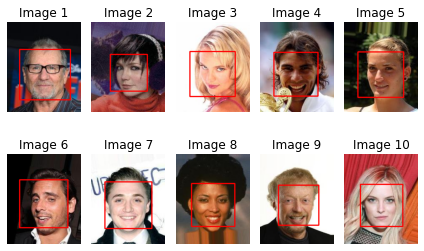

In [69]:
for i in range(10):
    plt.subplot(2, 5, i + 1)  
    img = draw_bounding_boxes(image_files[random_numbers[i]], faces[random_numbers[i]])
    plt.imshow(img, cmap='gray') 
    plt.axis('off')  
    plt.title(f'Image {i+1}')  


plt.tight_layout()  
plt.show()

In [74]:



prototxt_path = 'deploy.prototxt.txt'  
model_path = 'res10_300x300_ssd_iter_140000.caffemodel'  
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

no_face_DNN = []


for x in No_face:
    
    image_path = os.path.join(image_folder, image_files[x])
    frame = cv2.imread(image_path)

   
    original_height, original_width = frame.shape[:2]

    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    
    net.setInput(blob)
    detections = net.forward()

    # Check for the first detected face only
    if detections.shape[2] > 0:
        confidence = detections[0, 0, 0, 2]  
        if confidence > 0.5:  
            box = detections[0, 0, 0, 3:7] * np.array([300, 300, 300, 300])  
            (startX, startY, endX, endY) = box.astype("int")

            # Resize bounding box back to original image dimensions
            startX = int(startX * (original_width / 300))
            startY = int(startY * (original_height / 300))
            endX = int(endX * (original_width / 300))
            endY = int(endY * (original_height / 300))
            faces[x] = [startX, startY, endX - startX, endY - startY]
            print(f"{image_files[x]} found face at {faces[x]}")
        else:
            no_face_DNN.append(x)
            print(f"{image_files[x]} no face found with DNN")

            

000003.jpg found face at [ 22  49  92 149]
000004.jpg found face at [ 19  37 103 146]
000029.jpg found face at [ 40  62  92 120]
000036.jpg found face at [ 66  46 100 145]
000056.jpg found face at [ 42  63  80 113]
000060.jpg found face at [ 53  61 110 127]
000070.jpg found face at [ 55  53  93 133]
000120.jpg found face at [ 71 154 123 146]
000124.jpg found face at [ 45  65  71 108]
000137.jpg found face at [ 15  64 104 127]
000146.jpg found face at [ 17  58  99 132]
000149.jpg found face at [ 50  79  73 112]
000154.jpg found face at [ 46  74  83 115]
000159.jpg found face at [ 59  44 102 136]
000166.jpg found face at [ 43  69  98 114]
000167.jpg found face at [ 80  99 127 161]
000180.jpg found face at [ 46  59  95 121]
000184.jpg found face at [ 62  69  90 111]
000199.jpg no face found with DNN
000224.jpg found face at [ 45  56  89 122]
000227.jpg found face at [ 20  59  93 124]
000234.jpg found face at [ 56  61  74 122]
000240.jpg found face at [ 58  50  83 124]
000243.jpg found fac

In [75]:
print(len(no_face_DNN))

41


In [76]:
np.save('myfaces2.npy', faces)



with open('No_face2.pkl', 'wb') as file:
    pickle.dump(no_face_DNN, file)



In [7]:
faces = np.load('myfaces2.npy')
print(faces)  

# To load the list back
with open('No_face2.pkl', 'rb') as file:
    no_face_DNN= pickle.load(file)
    print(no_face_DNN)

[[ 40  74 100 100]
 [ 35  69 111 111]
 [ 22  49  92 149]
 ...
 [ 42  67 107 107]
 [ 38  76  98  98]
 [ 39  74 101 101]]
[198, 1400, 5197, 7725, 8643, 9220, 11792, 12286, 14998, 15548, 16529, 17245, 17701, 18945, 19204, 20343, 22802, 24183, 24608, 24821, 25267, 26134, 28433, 30781, 31124, 31161, 31523, 31957, 33691, 33845, 34714, 37379, 38069, 39142, 39811, 41896, 44859, 45539, 47455, 47795, 48458]


In [8]:

random_numbers = []


while len(random_numbers) < 10:
    number = random.randint(0, 49999)  
    
    if number in No_face and number not in no_face_DNN:  
        random_numbers.append(number)


print("Random Numbers:", random_numbers)

Random Numbers: [22313, 3429, 49778, 27465, 17466, 7958, 30088, 18247, 30674, 33655]


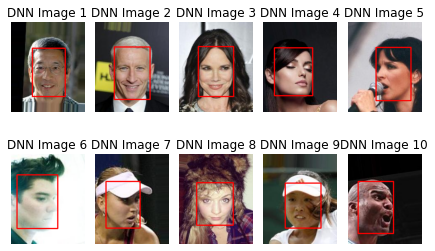

In [11]:
for i in range(10):
    plt.subplot(2, 5, i + 1) 
    img = draw_bounding_boxes(image_files[random_numbers[i]], faces[random_numbers[i]])
    plt.imshow(img, cmap='gray')  
    plt.axis('off')  
    plt.title(f'DNN Image {i+1}')  


plt.tight_layout()  
plt.show()

In [12]:


x = 0
y = 0
w = 0
h = 0

goal_len = 50000 - len(no_face_DNN)
total = 0
i = 0
while total < goal_len:
    if i not in no_face_DNN:
        x += faces[i][0]
        y += faces[i][1]
        w += faces[i][2]
        h += faces[i][3]
        total += 1
    i += 1

x1 = int(x / goal_len)
y1 = int(y / goal_len)
w1 = int(w / goal_len)
h1 = int(h / goal_len)

wrong_face = [2294, 6387, 35635, 41079]
for i in wrong_face:
    faces[i][0] = x1
    faces[i][1] = y1
    faces[i][2] = w1
    faces[i][3] = h1

for i in no_face_DNN:
    faces[i][0] = x1
    faces[i][1] = y1
    faces[i][2] = w1
    faces[i][3] = h1
     

In [13]:

random_numbers = []


while len(random_numbers) < 10:
    number = random.randint(0, 49999) 
   
    if number in no_face_DNN: 
        random_numbers.append(number)


print("Random Numbers:", random_numbers)

Random Numbers: [39811, 9220, 34714, 1400, 17245, 16529, 18945, 17701, 33691, 7725]


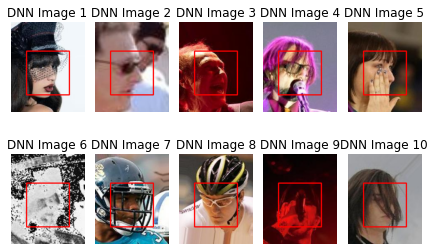

In [14]:
for i in range(10):
    plt.subplot(2, 5, i + 1) 
    img = draw_bounding_boxes(image_files[random_numbers[i]], faces[random_numbers[i]])
    plt.imshow(img, cmap='gray') 
    plt.axis('off')  
    plt.title(f'Image {i+1}')  


plt.tight_layout()  
plt.show()

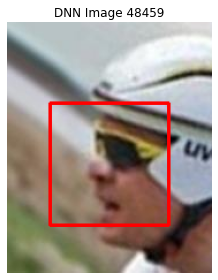

In [42]:
image_path = os.path.join(image_folder, image_files[2294])
face_image = cv2.imread(image_path)
img = draw_bounding_boxes(image_files[2294], faces[2294])
plt.subplot(1, 1, 1) 

plt.imshow(img, cmap='gray')  
plt.axis('off')  
plt.title(f'DNN Image {i+1}')  


plt.tight_layout()  
plt.show()

In [15]:
eyes = []
for i in range(50000):
    eyes.append([faces[i][0] +20,faces[i][1]+30 ,int(faces[i][2]/4) ,int(faces[i][3]/4)])

In [16]:

print(eyes)

[[60, 104, 25, 25], [55, 99, 27, 27], [42, 79, 23, 37], [39, 67, 25, 36], [51, 93, 29, 29], [60, 105, 24, 24], [57, 102, 25, 25], [62, 105, 23, 23], [47, 101, 27, 27], [59, 103, 25, 25], [54, 100, 27, 27], [54, 98, 27, 27], [53, 100, 28, 28], [55, 100, 26, 26], [53, 97, 28, 28], [57, 102, 26, 26], [51, 98, 28, 28], [55, 100, 27, 27], [60, 106, 24, 24], [56, 97, 26, 26], [59, 103, 24, 24], [59, 102, 25, 25], [51, 96, 28, 28], [59, 100, 25, 25], [55, 100, 26, 26], [63, 109, 23, 23], [53, 99, 26, 26], [57, 106, 25, 25], [60, 92, 23, 30], [63, 103, 23, 23], [50, 98, 29, 29], [60, 101, 25, 25], [59, 102, 25, 25], [66, 111, 21, 21], [56, 99, 26, 26], [86, 76, 25, 36], [62, 103, 24, 24], [52, 98, 28, 28], [56, 100, 25, 25], [55, 100, 26, 26], [49, 94, 33, 33], [52, 97, 28, 28], [50, 96, 29, 29], [62, 106, 23, 23], [54, 100, 28, 28], [55, 100, 27, 27], [57, 103, 26, 26], [52, 94, 27, 27], [63, 92, 29, 29], [57, 98, 27, 27], [56, 100, 26, 26], [56, 97, 26, 26], [50, 100, 29, 29], [52, 98, 28, 2

In [17]:
type(eyes)

list

In [19]:
random_numbers = []


while len(random_numbers) < 10:
    number = random.randint(0, 49999)  
    random_numbers.append(number)
    



print("Random Numbers:", random_numbers)

Random Numbers: [16051, 31608, 44217, 6108, 24598, 46380, 2985, 32795, 34882, 14234]


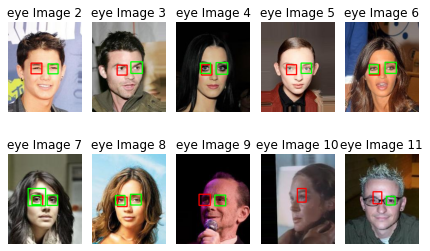

In [20]:
x1 = 1
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
for i in random_numbers:


    plt.subplot(2, 5,  x1) 

    img = draw_bounding_boxes(image_files[i], eyes[i])

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x = faces[i][0]
    y = faces[i][1]
    w = faces[i][2]
    h = faces[i][3]

    # cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]


    eye = eye_cascade.detectMultiScale(roi_gray)
    # print(eye)

    # Loop through each detected eye and draw a rectangle around it
    for (ex, ey, ew, eh) in eye:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


    plt.imshow(img, cmap='gray')  
    plt.axis('off')  
    plt.title(f'eye Image {x1+1}')  

    x1 += 1


plt.tight_layout() 
plt.show()

In [61]:
def get_skin_color_name(r, g, b):
  
    rgb_tuple = (r, g, b)
    
    
    skin_tones = {
        1: (255, 224, 189), #light_skin
        2: (224, 172, 105), #medium_light_skin
        3: (194, 142, 83), #medium_skin
        4: (143, 85, 54), #medium_dark_skin
        5: (78, 53, 36) #dark_skin
    }
    
    
    closest_color = None
    min_distance = float('inf')
    
    for color_name, color_rgb in skin_tones.items():
        
        distance = ((color_rgb[0] - r) ** 2 + (color_rgb[1] - g) ** 2 + (color_rgb[2] - b) ** 2) ** 0.5
        if distance < min_distance:
            min_distance = distance
            closest_color = color_name
            
    return closest_color
    




def get_skin_color_rgb(image, bbox):


    
   
    image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

   
    min_ycrcb = np.array([0, 133, 77], dtype=np.uint8)
    max_ycrcb = np.array([255, 173, 127], dtype=np.uint8)

    
    skin_mask = cv2.inRange(image_ycrcb, min_ycrcb, max_ycrcb)

   
    skin_region = cv2.bitwise_and(image, image, mask=skin_mask)

    
    x, y, w, h = bbox
    roi = skin_region[y:y+h, x:x+w]

   
    
    if roi.size == 0:
        return None 

    avg_color = cv2.mean(roi, mask=skin_mask[y:y+h, x:x+w])[:3]  

    
    r, g, b = map(int, avg_color[::-1])  

    return r, g, b





    
# def get_average_skin_color(image, bounding_box):
    
#     x, y, width, height = bounding_box
#     r_total = 0
#     g_total = 0
#     b_total = 0
#     pixel_count = 0
    
#     # Iterate through each pixel in the bounding box area
#     for i in range(y, y + height):
#         for j in range(x, x + width):
#             # Ensure we are within image bounds
#             if i < len(image) and j < len(image[0]):
#                 r, g, b = image[i][j]
#                 r_total += r
#                 g_total += g
#                 b_total += b
#                 pixel_count += 1
    
#     # Calculate average color
#     if pixel_count > 0:
#         r_final = r_total // pixel_count
#         g_final = g_total // pixel_count
#         b_final = b_total // pixel_count
#         average_color = get_skin_color(r_final, g_final, b_final)
#         return average_color
#     else:
#         return 0

In [62]:
skin_color = []
# image_path = os.path.join(image_folder, image_files[1])
# img = cv2.imread(image_path)
# r ,g ,b = get_skin_color_rgb(img, faces[1])
# print(r, g, b)
for i in range(50000):
    image_path = os.path.join(image_folder, image_files[i])
    img = cv2.imread(image_path)
    r, g, b = get_skin_color_rgb(img, faces[i])
    avg_skin = get_skin_color_name(r, g, b)
    print(avg_skin)
    skin_color.append(avg_skin)


3
3
3
3
3
4
3
3
4
4
3
3
3
4
3
3
3
3
3
3
4
3
3
2
4
4
3
3
2
3
3
3
3
4
2
4
4
2
4
3
3
3
4
4
3
3
4
3
2
3
3
3
4
3
2
3
2
2
4
3
3
3
3
3
3
4
4
3
4
3
3
3
3
2
3
3
3
4
3
3
3
3
3
3
3
2
3
2
2
4
3
3
4
2
3
4
4
3
3
3
4
3
4
2
3
4
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
4
3
3
3
2
3
2
3
3
3
4
4
4
3
4
3
3
3
3
4
3
3
4
3
3
3
2
3
3
3
4
4
3
3
4
2
3
2
4
3
3
4
5
3
4
2
4
2
3
4
3
3
3
3
3
3
4
3
4
3
3
4
2
3
4
3
3
3
4
3
3
1
4
4
4
5
3
3
4
4
3
3
2
4
4
4
4
4
3
3
3
3
3
3
2
4
2
4
3
3
4
3
4
3
2
3
4
1
3
2
3
3
4
4
4
3
4
4
5
3
3
4
3
3
4
2
4
3
3
3
3
3
4
3
3
4
3
4
3
4
3
3
4
4
5
3
4
4
3
3
3
5
3
3
3
4
3
4
3
3
3
3
4
4
4
2
3
3
3
5
4
3
4
3
5
3
5
3
3
4
4
3
3
3
3
5
3
3
4
3
4
3
3
3
4
3
4
3
3
4
3
3
4
2
3
3
3
4
5
4
3
4
4
4
3
4
4
4
3
2
4
4
2
2
3
4
4
2
3
4
3
4
3
3
4
4
2
4
3
3
3
4
4
3
2
5
3
3
3
4
4
3
4
3
3
4
3
3
2
3
4
3
4
4
3
4
4
3
2
2
3
2
3
4
3
3
3
3
3
2
4
3
3
4
4
3
4
3
3
4
3
3
2
2
5
4
4
3
2
4
4
4
4
3
3
4
3
3
2
4
5
3
4
4
3
5
3
3
3
2
3
4
3
5
4
2
3
4
2
4
3
3
3
4
2
4
2
3
4
4
2
3
4
4
3
4
3
3
3
3
4
2
3
4
3
4
4
2
5
3
4
3
3
3
4
3
4
4
3
3
3
4
3
3
3
3
3


In [65]:
with open('skin_color.pkl', 'wb') as file:
    pickle.dump(skin_color, file)

In [66]:
with open('skin_color.pkl', 'rb') as file:
    skin_color = pickle.load(file)

print("Loaded List:", skin_color)

Loaded List: [3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 3, 2, 3, 3, 3, 3, 4, 2, 4, 4, 2, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 2, 3, 3, 3, 4, 3, 2, 3, 2, 2, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 4, 3, 3, 4, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 2, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 2, 3, 2, 4, 3, 3, 4, 5, 3, 4, 2, 4, 2, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 2, 3, 4, 3, 3, 3, 4, 3, 3, 1, 4, 4, 4, 5, 3, 3, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 4, 2, 4, 3, 3, 4, 3, 4, 3, 2, 3, 4, 1, 3, 2, 3, 3, 4, 4, 4, 3, 4, 4, 5, 3, 3, 4, 3, 3, 4, 2, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 5, 3, 4, 4, 3, 3, 3, 5, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 2, 3, 3, 3, 5, 4, 3, 4, 3, 5, 3, 5, 3, 3, 4, 4, 3, 3, 3, 3, 5, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 2, 3, 3,

In [70]:
def get_eye_color(image, bbox):


    
  
    x, y, w, h = bbox
    
    eye_roi = image[y:y+h, x:x+w]
    
   
    eye_roi_rgb = cv2.cvtColor(eye_roi, cv2.COLOR_BGR2RGB)
    
   
    average_color = np.mean(eye_roi_rgb, axis=(0, 1))
    
    return tuple(average_color.astype(int))



def get_eye_color_name(r, g, b):
   
    rgb_tuple = (r, g, b)
    
   
    eye_colors = {
        1: (101, 67, 33), #brown
        2: (0, 0, 255), #blue
        3: (0, 128, 0), #green
        4: (118, 92, 66), #hazel
        5: (128, 128, 128), #gray
        6: (255, 191, 0) #amber
    }
    
  
    closest_color = None
    min_distance = float('inf')
    
    for color_name, color_rgb in eye_colors.items():
        
        distance = ((color_rgb[0] - r) ** 2 + (color_rgb[1] - g) ** 2 + (color_rgb[2] - b) ** 2) ** 0.5
        if distance < min_distance:
            min_distance = distance
            closest_color = color_name
            
    return closest_color


In [71]:
eye_color = []

for i in range(50000):
    image_path = os.path.join(image_folder, image_files[i])
    img = cv2.imread(image_path)
    r, g, b = get_eye_color(img, eyes[i])
    avg_eye = get_eye_color_name(r, g, b)
    print(avg_eye)
    eye_color.append(avg_eye)

5
5
4
4
4
5
5
5
5
5
5
4
4
4
5
4
4
5
5
5
5
5
5
4
5
5
5
5
5
5
4
4
5
5
5
4
4
5
4
5
4
5
5
1
5
5
1
1
5
5
5
5
1
4
5
5
5
5
1
4
4
5
5
5
5
5
1
5
5
5
5
5
5
5
4
4
5
4
5
5
5
5
5
5
5
5
5
5
5
4
5
5
4
5
4
1
4
5
5
5
4
5
4
5
5
4
5
5
5
4
5
5
4
4
5
5
4
4
5
4
5
5
5
1
5
4
5
5
5
5
5
5
5
5
4
5
5
1
5
4
4
5
5
1
5
4
5
5
5
5
5
4
5
1
4
5
5
1
5
4
5
5
5
4
5
1
4
4
5
4
5
5
4
5
5
5
5
5
5
4
4
4
4
5
5
5
4
4
1
5
4
5
1
5
5
4
5
5
1
5
5
1
4
4
5
5
5
5
5
4
4
5
5
5
5
5
4
5
5
5
5
4
5
5
5
4
5
5
5
4
5
5
5
5
4
5
5
4
5
5
4
4
4
5
1
5
4
4
5
4
5
4
5
5
5
1
5
5
5
5
5
5
1
5
5
4
5
1
4
4
5
4
5
5
1
5
5
5
5
5
5
4
4
5
5
4
5
4
5
5
5
5
1
4
5
4
5
1
5
1
5
5
4
4
4
5
5
4
1
1
5
4
5
4
5
5
5
5
5
4
4
5
5
5
5
4
5
5
5
4
5
4
4
4
1
4
5
5
4
4
1
5
5
5
4
5
5
4
4
1
5
5
5
4
5
5
4
4
5
5
4
5
1
4
4
4
4
5
4
5
5
4
1
1
1
4
5
5
4
4
4
5
4
4
5
4
5
5
4
1
5
5
5
4
5
5
5
5
5
4
5
4
5
4
5
5
4
4
5
4
4
5
4
5
5
5
5
1
4
5
5
5
5
4
1
4
5
4
4
5
5
5
1
1
5
5
4
4
1
4
5
5
5
4
4
4
1
4
5
5
4
5
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
5
5
4
5
5
4
5
1
4
5
1
5
4
5
4
5
5
5
4
5
5
5
5
4
5
5
4
5
4


In [74]:
with open('eye_color.pkl', 'wb') as file:
    pickle.dump(eye_color, file)

In [75]:
with open('eye_color.pkl', 'rb') as file:
    eye_color = pickle.load(file)

print("Loaded List:", eye_color)

Loaded List: [5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 1, 5, 5, 1, 1, 5, 5, 5, 5, 1, 4, 5, 5, 5, 5, 1, 4, 4, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 4, 1, 4, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 4, 5, 5, 5, 1, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 1, 5, 4, 4, 5, 5, 1, 5, 4, 5, 5, 5, 5, 5, 4, 5, 1, 4, 5, 5, 1, 5, 4, 5, 5, 5, 4, 5, 1, 4, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 4, 4, 1, 5, 4, 5, 1, 5, 5, 4, 5, 5, 1, 5, 5, 1, 4, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 4, 4, 5, 1, 5, 4, 4, 5, 4, 5, 4, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 4, 5, 1, 4, 4, 5, 4, 5, 5, 1, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5, 1, 4, 5, 4, 5, 1, 5, 1, 5, 5, 4, 4, 4, 5, 5, 4, 1, 1, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 5, 5,

In [79]:

csv_file_path = 'features.csv'
df = pd.read_csv(csv_file_path)


df['skin_color'] = skin_color
df['eye_color'] = eye_color

# df = pd.read_csv(csv_file_path, usecols=['eye_color'])
# print(df)


df.to_csv(csv_file_path, index=False)